# Download the datasets

https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

In [93]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from keras_preprocessing import image

In [94]:
#Initialising the CNN
classifier = Sequential()

In [95]:
# Step1 - Convolution
# Input Layer/dimensions
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
classifier.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

In [96]:
# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
classifier.add(Convolution2D(64,3,3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [97]:
# step3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())

In [98]:
# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie dog or cat
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
# sigmoid helps in 0 1 classification

# Compiling the CNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [100]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [101]:
training_set = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2635 images belonging to 2 classes.


In [102]:
test_set = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 660 images belonging to 2 classes.


In [103]:
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times
 
history=classifier.fit_generator(
        training_set,
        steps_per_epoch=2,
        epochs=30,
        validation_steps=2,
        validation_data=test_set)

score = classifier.evaluate(training_set)

Epoch 1/30
2/2 [==============================] - 1s 389ms/step - loss: 0.6872 - accuracy: 0.5116 - val_loss: 0.7202 - val_accuracy: 0.4062
Epoch 2/30
2/2 [==============================] - 0s 296ms/step - loss: 0.6456 - accuracy: 0.6406 - val_loss: 0.6054 - val_accuracy: 0.7031
Epoch 3/30
2/2 [==============================] - 0s 289ms/step - loss: 0.7325 - accuracy: 0.4844 - val_loss: 0.6403 - val_accuracy: 0.6406
Epoch 4/30
2/2 [==============================] - 0s 286ms/step - loss: 0.6627 - accuracy: 0.5781 - val_loss: 0.6731 - val_accuracy: 0.5469
Epoch 5/30
2/2 [==============================] - 0s 270ms/step - loss: 0.6607 - accuracy: 0.5938 - val_loss: 0.6486 - val_accuracy: 0.6562
Epoch 6/30
2/2 [==============================] - 0s 274ms/step - loss: 0.6621 - accuracy: 0.5781 - val_loss: 0.6408 - val_accuracy: 0.6875
Epoch 7/30
2/2 [==============================] - 0s 299ms/step - loss: 0.6870 - accuracy: 0.4844 - val_loss: 0.6595 - val_accuracy: 0.5625
Epoch 8/30
2/2 [====

limit_output extension: Maximum message size of 10000 exceeded with 10038 characters

In [104]:
print('Test accuracy:', score[1]*100, '%')

Test accuracy: 75.71157217025757 %


In [106]:
test_image = image.load_img('dataset/single_prediction/72b.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'benign'
else:
    prediction = 'malignant'
    
print('The prediction result is :',prediction)

1/1 [==============================] - 0s 19ms/step
The prediction result is : benign


In [107]:
test_image = image.load_img('dataset/single_prediction/27m.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'benign'
else:
    prediction = 'malignant'   

print('The prediction result is :',prediction)

1/1 [==============================] - 0s 20ms/step
The prediction result is : malignant


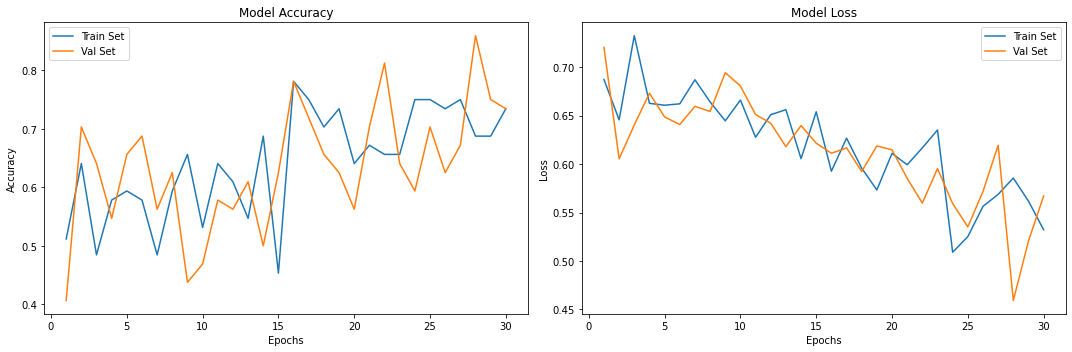

In [108]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()